In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="myGeocoder")

In [3]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

ModuleNotFoundError: No module named 'keras'

In [4]:
import os
for dirname, _, filenames in os.walk('/Users/rahulsharma/Documents/Project/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/rahulsharma/Documents/Project/Data/.DS_Store
/Users/rahulsharma/Documents/Project/Data/Crimes_-_2001_to_Present.csv
/Users/rahulsharma/Documents/Project/Data/archive/Chicago_Crimes_2008_to_2011.csv
/Users/rahulsharma/Documents/Project/Data/archive/Chicago_Crimes_2001_to_2004.csv
/Users/rahulsharma/Documents/Project/Data/archive/Chicago_Crimes_2012_to_2017.csv
/Users/rahulsharma/Documents/Project/Data/archive/Chicago_Crimes_2005_to_2007.csv


In [5]:
crime_2001_to_2004 = pd.read_csv('/Users/rahulsharma/Documents/Project/Data/archive/Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False)
crime_2005_to_2007 = pd.read_csv('/Users/rahulsharma/Documents/Project/Data/archive/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
crime_2008_to_2011 = pd.read_csv('/Users/rahulsharma/Documents/Project/Data/archive/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
crime_2012_to_2017 = pd.read_csv('/Users/rahulsharma/Documents/Project/Data/archive/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
/Users/rahulsharma/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [6]:
crime_2001_to_2017 = pd.concat([crime_2001_to_2004, crime_2005_to_2007, crime_2008_to_2011, crime_2012_to_2017], ignore_index=False, axis=0)

In [7]:
crime_2001_to_2017.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [8]:
crime_2001_to_2017.isna().sum()

Unnamed: 0                   0
ID                           0
Case Number                  7
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1990
Arrest                       0
Domestic                     0
Beat                         0
District                    91
Ward                    700224
Community Area          702091
FBI Code                     0
X Coordinate            105573
Y Coordinate            105573
Year                         0
Updated On                   0
Latitude                105573
Longitude               105574
Location                105574
dtype: int64

In [9]:
crime_2001_to_2017_without_nan = crime_2001_to_2017.dropna()

In [10]:
crime_2001_to_2017_without_nan.isna().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [11]:
crime_2001_to_2017_without_nan.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"
6,3756,4791194,HM403711,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,9.0,50.0,02,1182247.0,1.82938e+06,2001.0,08/29/2006 03:46:28 AM,41.687,-87.608445,"(41.687020002, -87.60844523)"
7,4502,4679521,HM216293,03/15/2003 12:00:00 AM,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,...,21.0,73.0,26,1169911.0,1.84483e+06,2003.0,04/15/2016 08:55:02 AM,41.7297,-87.653159,"(41.729712374, -87.653158513)"
9,4904,4680124,HM282389,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,24.0,29.0,06,1154521.0,1.89576e+06,2003.0,04/15/2016 08:55:02 AM,41.8698,-87.708180,"(41.869772159, -87.708180162)"


/Users/rahulsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


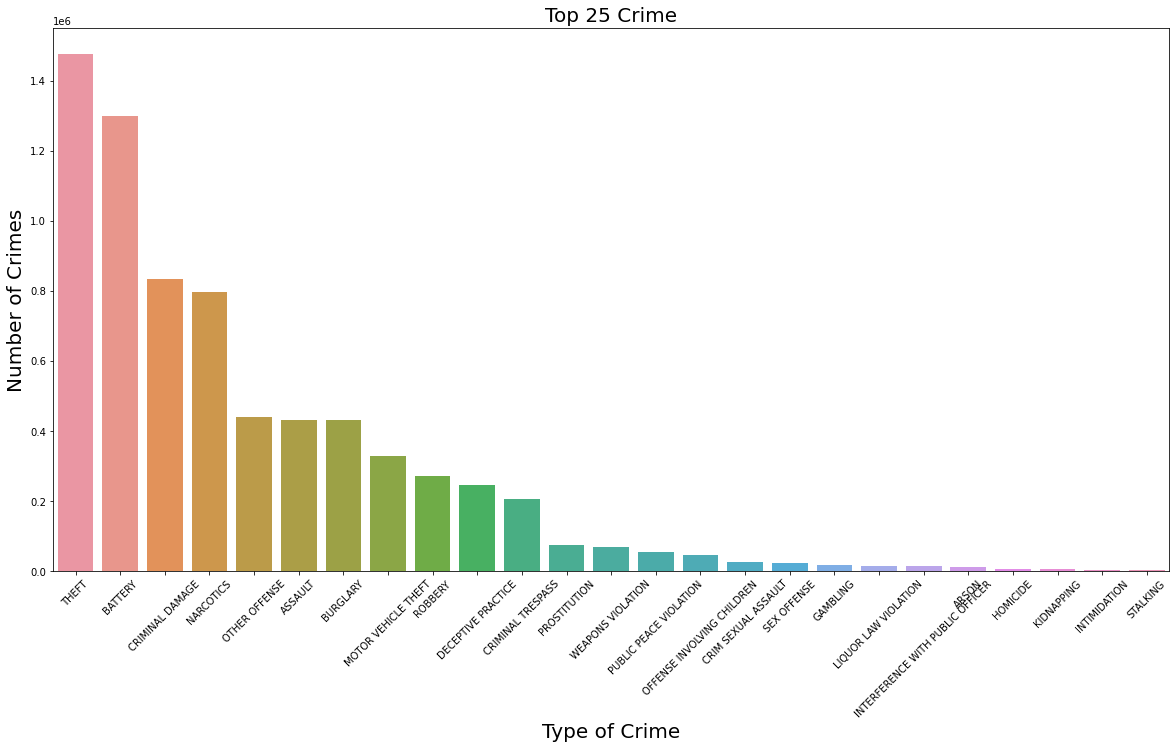

In [12]:
# type_of_crimes = crime_2001_to_2017_without_nan['Primary Type'].unique()
# crime_2001_to_2017_without_nan['Primary Type'].value_counts().plot(kind = 'bar', figsize=(20, 20), rot=45)
# plt.xlabel('Type of Crime')
# plt.ylabel('Crime Count')

crime_count  = crime_2001_to_2017_without_nan['Primary Type'].value_counts()
crime_count = crime_count[:25,]
plt.figure(figsize=(20, 10))
sns.barplot(crime_count.index, crime_count.values)
plt.title('Top 25 Crime', fontsize=20)
plt.ylabel('Number of Crimes', fontsize=20)
plt.xlabel('Type of Crime', fontsize=20)
plt.xticks(rotation=45)
plt.show()

/Users/rahulsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


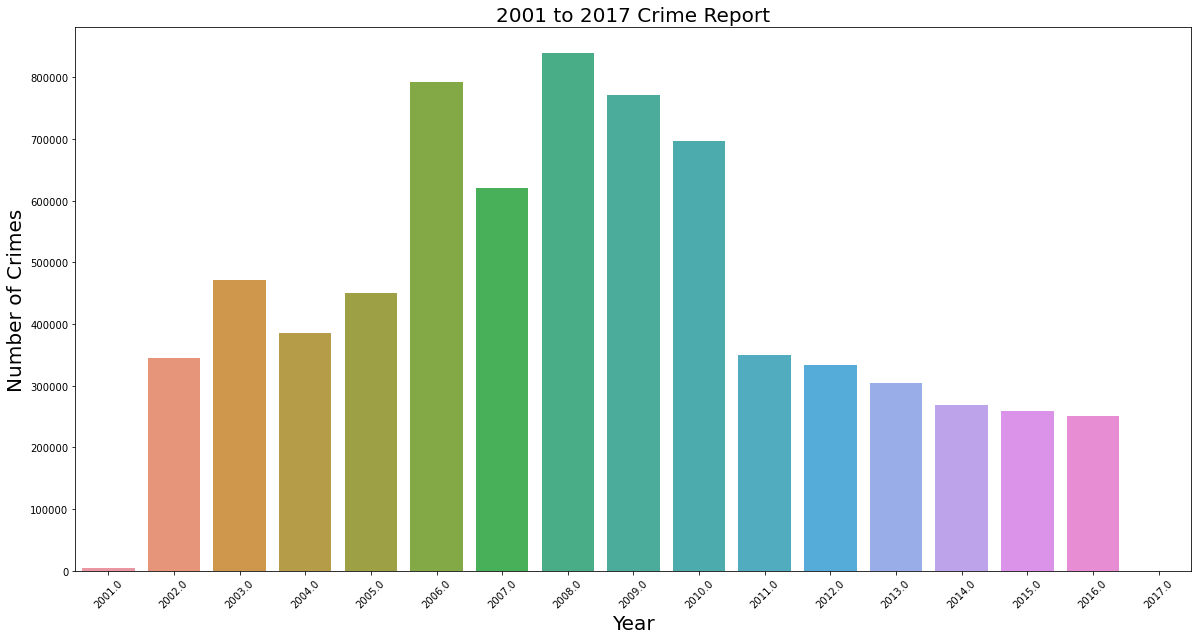

In [13]:
crime_count  = crime_2001_to_2017_without_nan['Year'].value_counts()
plt.figure(figsize=(20, 10))
sns.barplot(crime_count.index, crime_count.values)
plt.title('2001 to 2017 Crime Report', fontsize=20)
plt.ylabel('Number of Crimes', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(rotation=45)
plt.show()

/Users/rahulsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


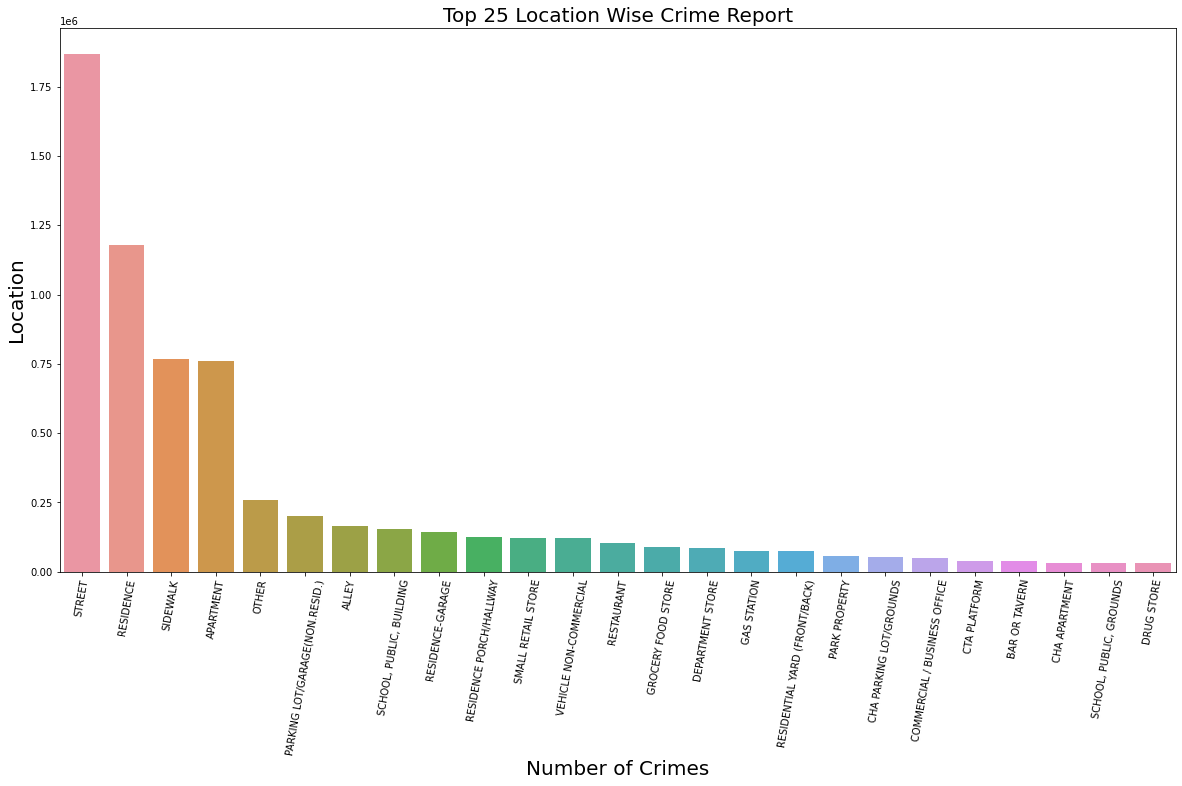

In [14]:
crime_count  = crime_2001_to_2017_without_nan['Location Description'].value_counts()
crime_count = crime_count[:25,]
plt.figure(figsize=(20, 10))
sns.barplot(crime_count.index, crime_count.values)
plt.title('Top 25 Location Wise Crime Report', fontsize=20)
plt.xlabel('Number of Crimes', fontsize=20)
plt.ylabel('Location', fontsize=20)
plt.xticks(rotation=80)
plt.show()

In [16]:
locations = crime_2001_to_2017_without_nan.groupby('Community Area').first()
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_locations.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.881537,-87.616595,STREET,False
1.0,42.001679,-87.660604,"SCHOOL, PRIVATE, GROUNDS",True
2.0,41.998765,-87.683672,APARTMENT,False
3.0,41.966409,-87.648852,STREET,False
4.0,41.978354,-87.692456,MEDICAL/DENTAL OFFICE,False


In [17]:
chicago_map = folium.Map(location=[41.864073,-87.706819], zoom_start=11)
for i in range(len(new_locations)):
    lat = new_locations.iloc[i]['Latitude']
    long = new_locations.iloc[i]['Longitude']
#     popup_text = """Community Index : {}<br>
#                 Arrest : {}<br>
#                 Location Description : {}<br>"""
#     popup_text = popup_text.format(new_locations.index[i],
#                                new_locations.iloc[i][-1],
#                                new_locations.iloc[i][-2]
#                                )
    folium.CircleMarker(location = [lat, long], 
#                         popup= popup_text,
                        fill = True).add_to(chicago_map)
chicago_map

In [18]:
unique_locations = crime_2001_to_2017_without_nan['Location'].value_counts()
crime_rate_index = pd.DataFrame({"Unique Location" : unique_locations.index, "Crime Reported":unique_locations})
crime_rate_index.head()

,Unique Location,Crime Reported
"(41.976290414, -87.905227221)","(41.976290414, -87.905227221)",16899
"(41.754592961, -87.741528537)","(41.754592961, -87.741528537)",10950
"(41.883500187, -87.627876698)","(41.883500187, -87.627876698)",7280
"(41.897895128, -87.624096605)","(41.897895128, -87.624096605)",4544
"(41.909664252, -87.742728815)","(41.909664252, -87.742728815)",3807


In [19]:
def Location_extractor(Location):
    location_without_parenthesis = Location[1:-1].split(',')
    lat =  float(location_without_parenthesis[0])
    long = float(location_without_parenthesis[1])
    return (lat, long)

In [20]:
crime_rate_index['Location Coordinates'] = crime_rate_index['Unique Location'].apply(Location_extractor)

In [21]:
chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13)
for i in range(len(crime_rate_index)):
    lat = crime_rate_index['Location Coordinates'].iloc[i][0]
    long = crime_rate_index['Location Coordinates'].iloc[i][1]
    radius = crime_rate_index['Crime Reported'].iloc[i] / 45
    
    if crime_rate_index['Crime Reported'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               crime_rate_index['Crime Reported'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

In [ ]:
chicago_map_crime